<a href="https://colab.research.google.com/github/Rafism7/Crack_Detection_Code_Final_Project/blob/master/Crack_Detection_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle


%matplotlib inline

In [4]:
! git clone https://github.com/Rafism7/Final-year-Project-A-post-Earthquake-scenario-Robot-.git

Cloning into 'Final-year-Project-A-post-Earthquake-scenario-Robot-'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 9918 (delta 0), reused 0 (delta 0), pack-reused 9914
Receiving objects: 100% (9918/9918), 55.33 MiB | 10.43 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [5]:
DATADIR = "Final-year-Project-A-post-Earthquake-scenario-Robot-/Crack_Detection_Dataset/Dataset"
Categories = ["Negative", "Positive"]

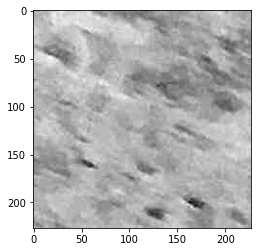

In [6]:
for category in Categories:
    path = os.path.join(DATADIR, category) #path to crack and non-crac dir
    #For showing sample image
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [7]:
print(img_array.shape)

(227, 227)


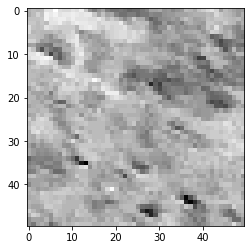

In [8]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap= 'gray')
plt.show()

training_data = []

In [9]:
def create_training_data():
    for category in Categories:
        path = os.path.join(DATADIR, category) 
        class_num = Categories.index(category) 
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])         
            except Exception as e:
                pass        #If there is any broken images it will be neglected

create_training_data()

In [10]:
print(len(training_data))        

10000


In [11]:
random.shuffle(training_data)  

In [12]:
X = [] 
y = [] 

In [13]:
#appending the features and labels value to the empty list
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)    


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:])) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64)) 
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss= "binary_crossentropy", optimizer="adam", metrics=['accuracy'])

model.fit(X,y,batch_size=32,epochs=20,validation_split= 0.1)   # spliting the validation into 10%

Epoch 1/20
282/282 [==============================] - 3s 11ms/step - loss: 0.1566 - accuracy: 0.9338 - val_loss: 0.0605 - val_accuracy: 0.9850
Epoch 2/20
282/282 [==============================] - 3s 10ms/step - loss: 0.0497 - accuracy: 0.9844 - val_loss: 0.0653 - val_accuracy: 0.9760
Epoch 3/20
282/282 [==============================] - 3s 10ms/step - loss: 0.0599 - accuracy: 0.9839 - val_loss: 0.0463 - val_accuracy: 0.9860
Epoch 4/20
282/282 [==============================] - 3s 10ms/step - loss: 0.0483 - accuracy: 0.9857 - val_loss: 0.0490 - val_accuracy: 0.9850
Epoch 5/20
282/282 [==============================] - 3s 10ms/step - loss: 0.0518 - accuracy: 0.9849 - val_loss: 0.0598 - val_accuracy: 0.9800
Epoch 6/20
282/282 [==============================] - 3s 10ms/step - loss: 0.0361 - accuracy: 0.9896 - val_loss: 0.0499 - val_accuracy: 0.9850
Epoch 7/20
282/282 [==============================] - 3s 10ms/step - loss: 0.0339 - accuracy: 0.9902 - val_loss: 0.0491 - val_accuracy: 0.9870

In [15]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [16]:
ls

drive/  Final-year-Project-A-post-Earthquake-scenario-Robot-/  sample_data/


In [17]:
cd drive/

/content/drive


In [18]:
ls


'My Drive'/


In [19]:
cd My Drive

/content/drive/My Drive


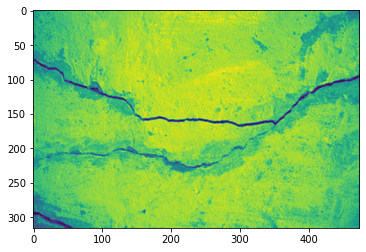

Crack Detected


In [21]:
import cv2

img = cv2.imread('Crack_Image.jpeg', cv2.IMREAD_GRAYSCALE)

def prepare(filepath):
  img_array1 = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  new_array1 = cv2.resize(img_array1, (IMG_SIZE, IMG_SIZE))
  return new_array1.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

prediction = model.predict([prepare('Crack_Image.jpeg')])

plt.imshow(img)
plt.show()

if prediction>0.5:
  print("Crack Detected")
else:
  print("No Crack detected")